`Project 1 Proposal 

Level 1`
`Description:`

`In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.`



In [ ]:
#import libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the Dataset:

In [3]:
mydata=pd.read_csv(r"C:\Users\a\Desktop\intership2\retail_sales_dataset.csv")

In [4]:
mydata.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


# Inspect the Dataset:

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
mydata.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# 4 Check for Missing Values:

In [7]:
mydata.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Step 2: Perform Descriptive Statistics

In [8]:
mydata[[ "Quantity","Price per Unit","Total Amount"]].describe()

,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.000000
mean,2.514000,179.890000,456.000000
std,1.132734,189.681356,559.997632
min,1.000000,25.000000,25.000000
25%,1.000000,30.000000,60.000000
50%,3.000000,50.000000,135.000000
75%,4.000000,300.000000,900.000000
max,4.000000,500.000000,2000.000000


# 3 step Analyze customer demographics:

In [9]:
mydata["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [11]:
mydata["Customer ID"].nunique()

1000

# Step 4: Analyze Sales Trends Over Time

In [12]:
mydata.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [15]:
#conver data to datatime format
mydata["Date"]=mydata["Date"].astype('datetime64[ns]')

In [14]:
mydata.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [16]:
mydata['month']=mydata['Date'].dt.to_period('M')

In [17]:
monthly_sale=mydata.groupby('month')['Total Amount'].sum()

In [15]:
monthly_sale

month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64

In [18]:
print(monthly_sale.head())


month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
Freq: M, Name: Total Amount, dtype: int64


In [19]:
monthly_sale.index = monthly_sale.index.to_timestamp()  # Convert PeriodIndex to Timestamp
monthly_sale.index = monthly_sale.index.strftime('%B %Y')  # Format as "Month Year"


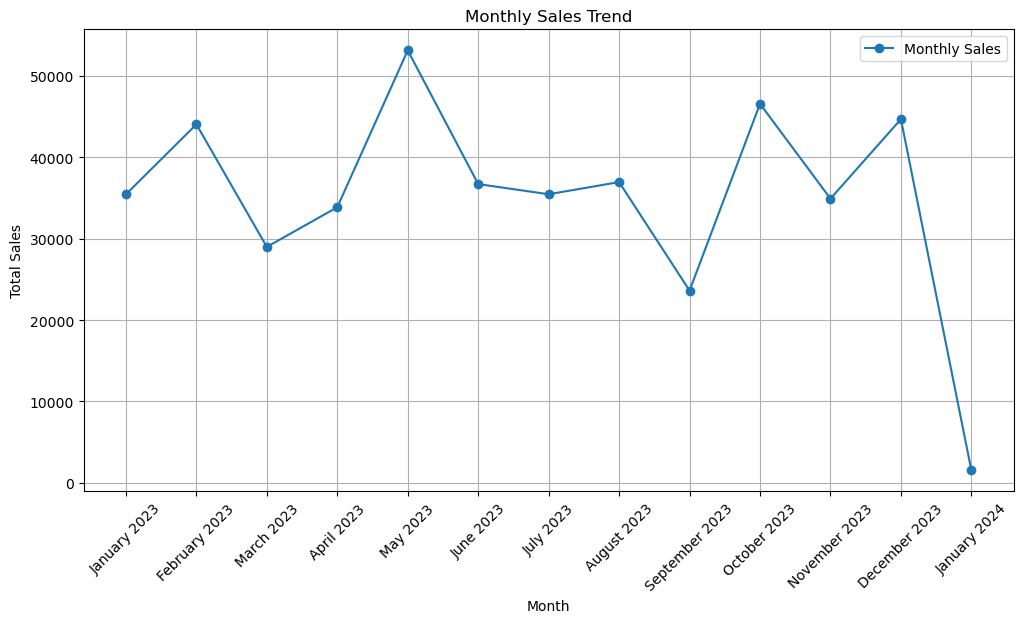

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sale.index, monthly_sale.values, marker='o', label='Monthly Sales') # Line Chart with Markers. 
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate for better visibility
plt.grid()
plt.legend()
plt.show()


# Step 4: Customer and Product Analysis

# Top product

In [21]:
Top_products=mydata.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
Top_products.head()

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

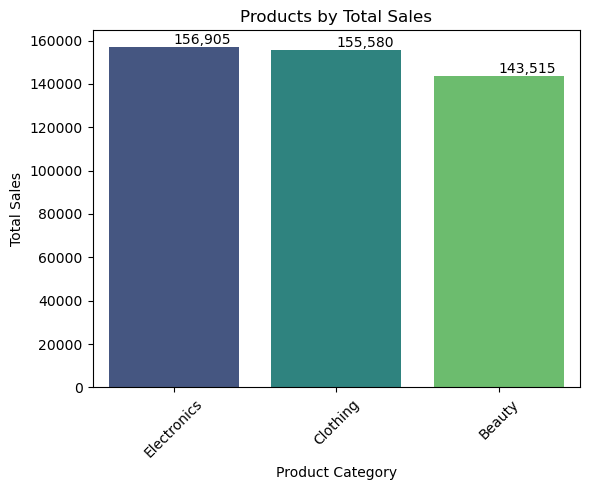

In [29]:
plt.figure(figsize=(6, 5))

# Create the bar plot with hue set to x (to apply the palette without warning)
sns.barplot(x=Top_products.index, y=Top_products.values, hue=Top_products.index, dodge=False, palette='viridis', legend=False)

# Add title and adjust x-axis labels
plt.title("Products by Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, fontsize=10)

# Annotate bars with total sales values
for i, value in enumerate(Top_products.values):
    plt.text(i, value + (value * 0.01), f'{value:,}')

# Show the plot
plt.tight_layout()
plt.show()



# Customer Purchase Behavior:

In [30]:
customer_behaviour=mydata.groupby("Customer ID")["Total Amount"].sum().sort_values(ascending=False)
customer_behaviour.head()

Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64

# Gender-Based Analysis

In [31]:
Gender_sales=mydata.groupby("Gender")["Total Amount"].sum()
Gender_sales

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

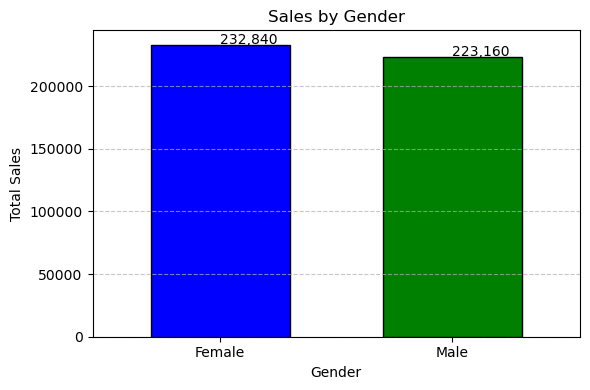

In [34]:

plt.figure(figsize=(6, 4))

# Set custom colors for Male and Female
colors = ['blue', 'green']  # Choose colors for each category
ax = Gender_sales.plot(kind='bar', color=colors, edgecolor='black', width=0.6)


# Add labels and title
plt.title("Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.yticks(fontsize=10)

# Annotate bars with total sales values
for i, value in enumerate(Gender_sales):
    plt.text(i, value + 1000, f'{value:,}')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()


Step 5: Recommendations
Based on your findings, write actionable recommendations. For example:

Focus marketing efforts on top-selling products.
Design promotions targeted at high-value customers.
Encourage repeat purchases from certain customer segments (e.g., gender-specific promotions).

# Insight and recomendation

-

# **1. Customer Demograps**  
Female customers (51%) slightly outnumber males (49%) and spend m
recommendation 
ore. Targeted campaigns can boost engagement across both genders

--

### **2. Sales Trends  Time**  
May 2023 saw peak sales, while January 2024 droppe
recommendation 
 sharply. Seasonal promotions and loyalty programs can stabilize yearly re.  
---

### **3. Top ProdCategories**  
Electronics, Clothing, and Beauty 
recommendation 
lead in sales. Focus on bundles, cross-selling, and exclusive deals to sustain categrowt  

---

### **4. Customeurchase Behavior**  
Top customer
recommendation 
 spent $2,000 each. Reward loyalty with VIP offers and segment potential buyers to nurture more high-uneed additional changes!itional changes!